In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from venn import venn

In [3]:
chrome_old_train = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_01.parquet.gzip", engine="pyarrow",
            dtype_backend="pyarrow"
)
chrome_old_test = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/test_set_01.parquet.gzip", engine="pyarrow",
            dtype_backend="pyarrow"
)

chrome_new = pd.read_parquet('../data/processed/chrome/03_29_2023/merged_data.parquet.gzip', engine="pyarrow", dtype_backend="pyarrow")

firefox = pd.read_parquet('../data/processed/firefox/08_12_2022/test_set.parquet.gzip', engine="pyarrow",
            dtype_backend="pyarrow")

brave = pd.read_parquet('../data/processed/brave/08_12_2022/test_set_0123.parquet.gzip', engine="pyarrow",
            dtype_backend="pyarrow")

chrome_old = pd.concat([chrome_old_train, chrome_old_test])

In [190]:
%%time
chrome_old_values_count = chrome_old.iloc[:, 6:-1].count().to_numpy()
chrome_new_values_count = chrome_new.iloc[:, 6:-1].count().to_numpy()
# chrome_old_values_count = pd.DataFrame(chrome_old_values_count.values.reshape(1, -1), columns=chrome_old_values_count.index.tolist())
# chrome_old_values_count = chrome_old_values_count.T.sort_values(by=0, ascending=False).T

CPU times: user 10.1 s, sys: 2.97 s, total: 13 s
Wall time: 15.4 s


In [84]:
firefox_values_count = firefox.iloc[:, 6:-1].count().to_numpy()
brave_values_count = brave.iloc[:, 6:-1].count().to_numpy()

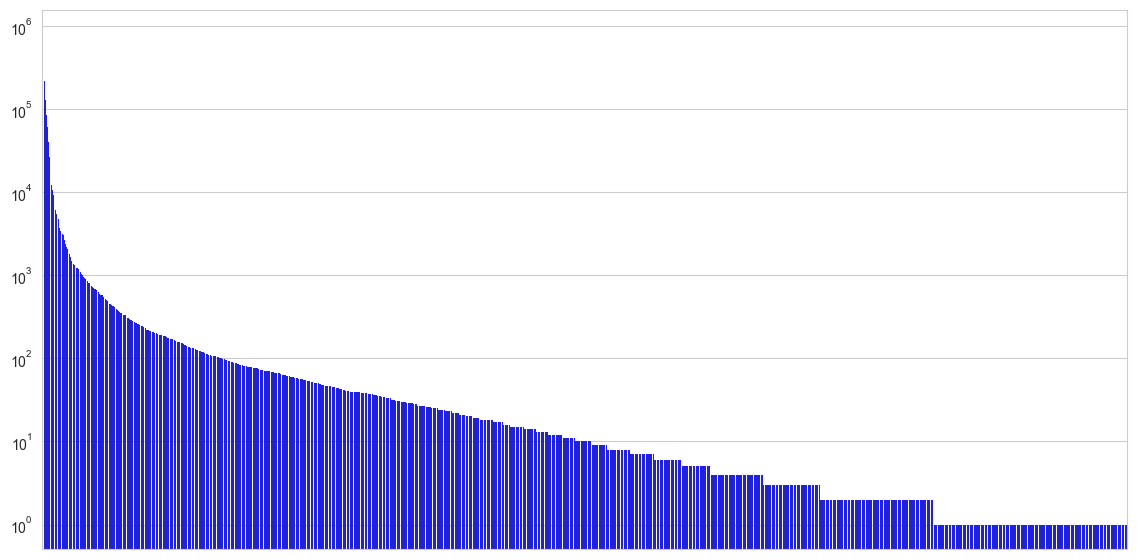

In [20]:
plt.figure(figsize=(14, 7))
sns.barplot(chrome_old_values_count.iloc[:, :], color='blue', lw=0.).set(xticklabels=[])
plt.yscale('log')

In [191]:
chrome_new_values_count[::-1].sort()
chrome_old_values_count[::-1].sort()

In [85]:
firefox_values_count[::-1].sort()
brave_values_count[::-1].sort()

In [192]:
a = pd.DataFrame([chrome_old_values_count, chrome_new_values_count, firefox_values_count, brave_values_count]).T

In [60]:
# a.replace(np.nan, 0, inplace=True)

In [193]:
a.rename(columns={0: 'chrome_old', 1: 'chrome_new', 2: 'firefox', 3: 'brave'}, inplace=True)

In [238]:
sns.set_theme(style="white", font_scale=1.2)
fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(1, 3)
g = sns.lineplot(a, ax=grid[0, :2])
plt.yscale('log')
g.set(
    # yticklabels=[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    xlim=(0, 8000),
    title="Number of HTTP/S responses per header"
)
f = sns.catplot(a, kind='boxen', ax=grid[0, 2:])
plt.yscale('log')

AttributeError: 'SubplotSpec' object has no attribute 'yaxis'

<Figure size 1200x400 with 0 Axes>

In [167]:
len(chrome_old_values_count), len(chrome_new_values_count), len(firefox_values_count), len(brave_values_count)

(5309, 7896, 6324, 7363)

In [181]:
np.median(chrome_old_values_count)

7.0

In [186]:
chrome_old_values_count

array([270283, 262018, 227613, ...,      0,      0,      0])

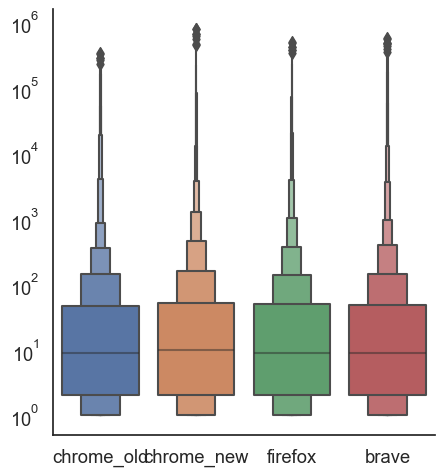

In [215]:
sns.catplot(a, kind='boxen')
plt.yscale('log')

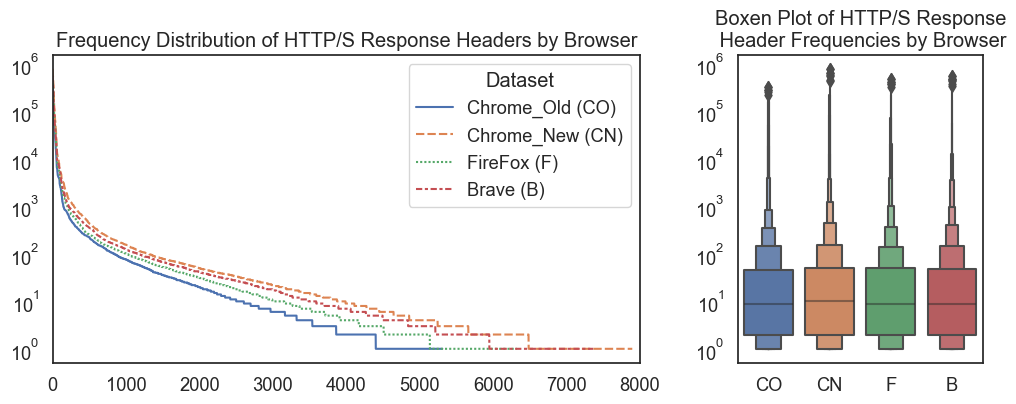

In [258]:
sns.set_theme(style="white", font_scale=1.2)
fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(1, 3, wspace=0.4)  # Add wspace for space between plots

# Line plot
ax1 = fig.add_subplot(grid[0, :2])
sns.lineplot(data=a, ax=ax1)  # Assuming 'a' is the dataset for the line plot
ax1.set_yscale('log')
ax1.set_xlim(0, 8000)
ax1.set_title("Frequency Distribution of HTTP/S Response Headers by Browser")

# Catplot (boxen plot)
ax2 = fig.add_subplot(grid[0, 2])
sns.boxenplot(data=a, ax=ax2)  # Assuming 'a' is the dataset for the boxen plot
ax2.set_yscale('log')
ax2.set_title("Boxen Plot of HTTP/S Response\n Header Frequencies by Browser")  # Replace with your desired title
xticklabels = ['CO', 'CN', 'F', 'B']
ax2.set_xticklabels(xticklabels)

# Legend
handles, labels = ax1.get_legend_handles_labels()
new_labels = ['Chrome_Old (CO)', 'Chrome_New (CN)', 'FireFox (F)', 'Brave (B)']
ax1.legend(handles, new_labels, loc="upper right", title="Browser")

plt.show()

Figure 1 illustrates the usage of HTTP/S response headers across four different browsers. The left plot (a) displays the frequency distribution of HTTP/S response headers for each browser, showing how often each header is present in the dataset. The right plot (b) presents a boxen plot of the same data, which provides a more detailed view of the distribution, revealing variations and trends among the browsers. The browsers are represented by their abbreviations: CO (Browser 1), CN (Browser 2), F (Browser 3), and B (Browser 4). Both plots are shown on a logarithmic scale to better visualize the wide range of header frequency values.

<Figure size 200x200 with 0 Axes>

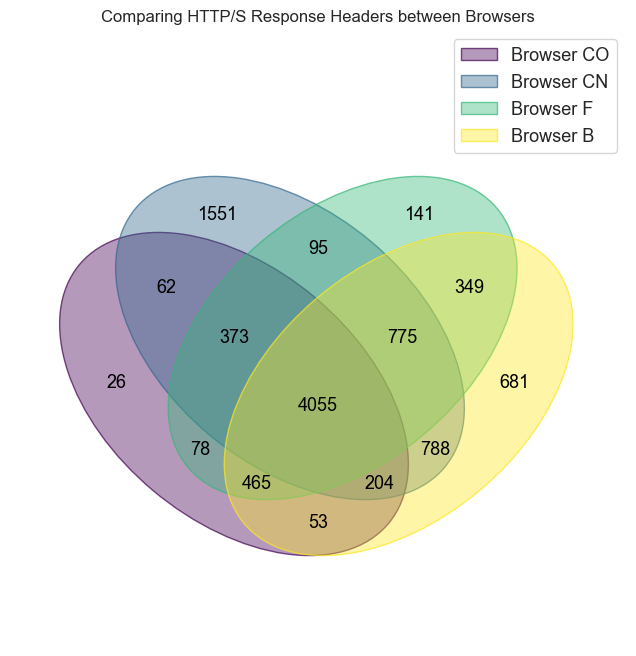

In [16]:
# Assuming the lists are named list1, list2, list3, and list4
set1 = set(chrome_old.columns.to_list())
set2 = set(chrome_new.columns.to_list())
set3 = set(firefox.columns.to_list())
set4 = set(brave.columns.to_list())

# Combine all sets into a dictionary
data_dict = {
    'Browser CO': set1,
    'Browser CN': set2,
    'Browser F': set3,
    'Browser B': set4
}

plt.figure(figsize=(2, 2))
venn(data_dict)
plt.title("Comparing HTTP/S Response Headers between Browsers")
plt.show()

Figure 1 presents a four-set Venn diagram comparing the HTTP/S response headers between four browsers: CO, CN, F, and B. Each circle in the diagram represents one browser, and the overlapping areas between the circles illustrate the common response headers shared by the corresponding browsers. The numbers within each section of the circles indicate the count of unique response headers for that particular combination of browsers. This visualization enables a comprehensive understanding of the similarities and differences in the HTTP/S response headers used by each browser and highlights the extent to which their header usage overlaps.

In [1]:
def sparsity_ratio(df):
    np_array = df.to_numpy()
    num_zeros = np.count_nonzero(np_array == 0) + np.isnan(np_array).sum()
    total_elements = np_array.size
    sparsity = num_zeros / total_elements
    return sparsity

def density(df):
    return 1 - sparsity_ratio(df)

def gini_index(df):
    np_array = df.to_numpy().flatten()
    np_array = np_array[~np.isnan(np_array)]
    n = len(np_array)
    gini = (np.sum((2 * np.arange(n) - n + 1) * np.sort(np_array))) / (n * np.sum(np_array))
    return gini

def shannon_entropy(df):
    np_array = df.to_numpy()
    unique_elements, counts = np.unique(np_array, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [ ]:
# Usage
sparsity = sparsity_ratio(chrome_old)
print("Sparsity Ratio:", sparsity)
print("Density:", density(chrome_old))

In [5]:
a = chrome_old.to_numpy()

In [8]:
np.count_nonzero(a[:100,:100] == 0)

/var/folders/wk/770974_933q_mcw9wsl_nvkw0000gn/T/ipykernel_47247/4176296220.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  np.count_nonzero(a[:100,:100] == 0)
/var/folders/wk/770974_933q_mcw9wsl_nvkw0000gn/T/ipykernel_47247/4176296220.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.count_nonzero(a[:100,:100] == 0)


0

In [18]:
import pyarrow as pa

In [17]:
chrome_old.dtypes

hostname              string[pyarrow]
pathname              string[pyarrow]
filetype              string[pyarrow]
filename              string[pyarrow]
protocol              string[pyarrow]
                           ...       
x-ta                  string[pyarrow]
x-cache-cms-status    string[pyarrow]
x-pbs-appsvrname      string[pyarrow]
x-pbs-appsvrip        string[pyarrow]
tracker                int32[pyarrow]
Length: 5316, dtype: object